In [508]:
from scipy.stats import norm, gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import functools

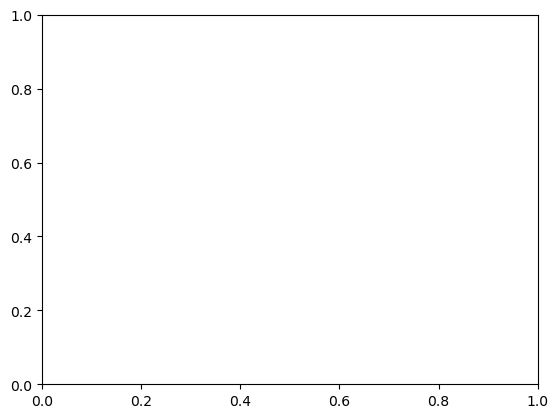

In [568]:
fig, ax = plt.subplots()
N = 30
X = np.tile(np.linspace(-2, 2, 1000), (N, 1))
Y = np.array([norm.pdf(x, loc=1e-2 * i, scale=np.random.random(1)) for i, x in enumerate(X)])

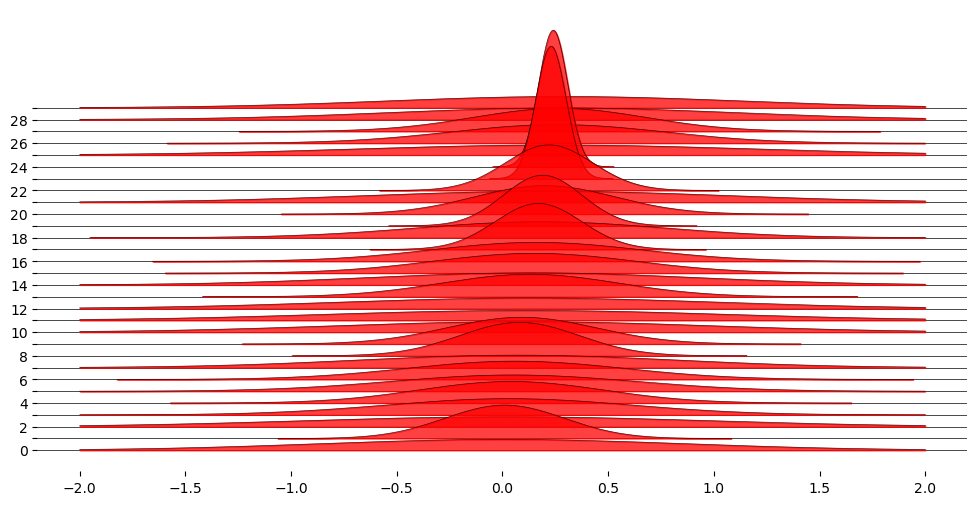

In [572]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections

import numpy as np

def ridgeline_plot(X, Y, ax, y_labels, fill="y", overlap=0.5, range_threshold=None, fade=1, beta=1):
    """
    Create a ridgeline plot using pure Matplotlib.

    Parameters:
    - ax: Matplotlib axis where the plot will be drawn.
    - X: Matrix containing evaluation points as rows.
    - Y: Matrix containing corresponding values of the density.
    - x_axis_label: Label for the x-axis.
    - y_axis_label: Label for the y-axis.
    - title: Title of the plot.
    - fill: Whether to fill the areas between the lines.
    - overlap: Overlap factor controlling the spacing between groups.
    """
    N = X.shape[0]
    for i, (x, y) in enumerate(zip(X, Y)):
        offset = i * (1 - overlap)
        if range_threshold:
            x = x[y > range_threshold]
            y = y[y > range_threshold]
        if fill:
            ax.fill_between(x, np.ones_like(x) * offset, offset + y, alpha=fade, label=y_labels[i],  zorder=len(Y) - i + 1, color="red")
        ax.plot(x, y + offset, c="k", zorder=len(Y) - i + 1, alpha=fade, linewidth=0.5)

    for loc in ["top", "bottom", "left", "right"]:
        ax.spines[loc].set_visible(False)
    ax.set_yticks([i * ( 1 - overlap) for i in range(len(X))])
    ax.set_yticklabels([y_labels[i] for i in range(X.shape[0])])
    # ax.yaxis.set_tick_params(width=0)
        
# Create the Matplotlib axis
fig, ax = plt.subplots(figsize=(12, 6))

# Pass the axis to the function
ridgeline_plot(X, Y, ax, y_labels=[i if i % 2 == 0 else None for i in range(N)], overlap=0.5, range_threshold=1e-3, fade=0.75)
ax.yaxis.grid(True, linewidth=0.5, color="black")
# Show the plot
plt.show()


/var/folders/zk/8tsl64_x29qcn5z6qjdgwh5h0000gn/T/ipykernel_2486/3589945424.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


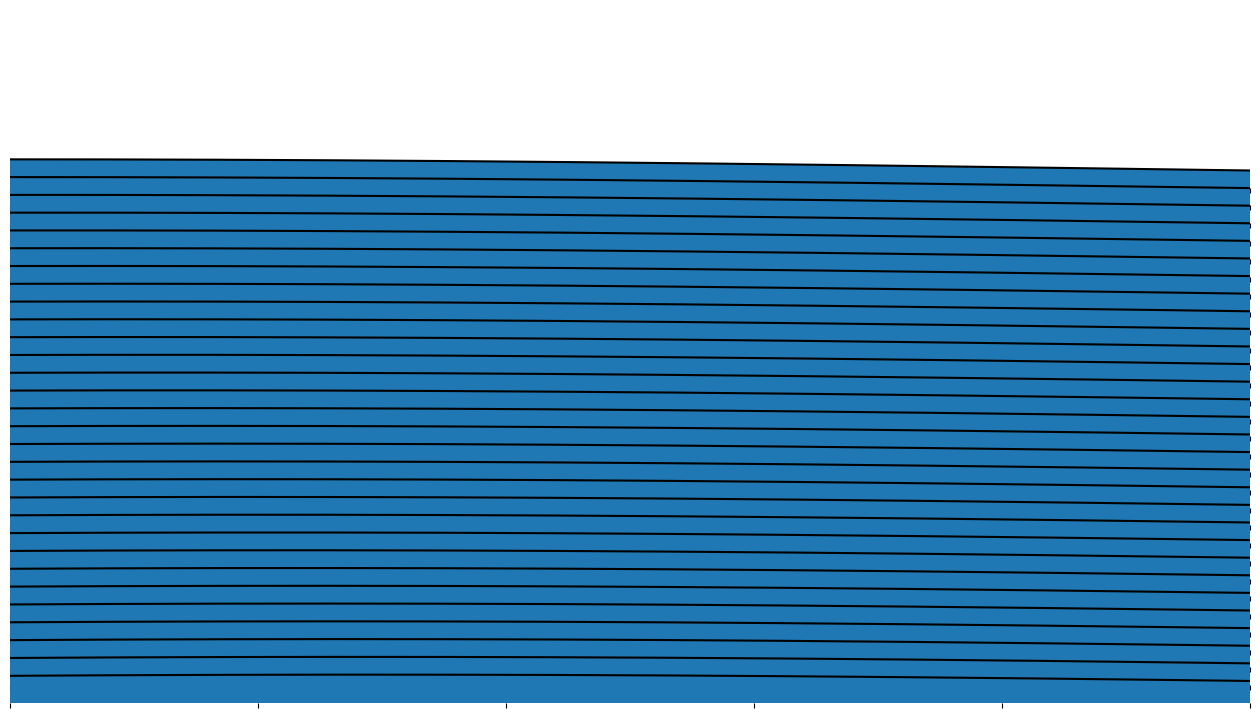

In [567]:
import matplotlib.gridspec as grid_spec

gs = grid_spec.GridSpec(X.shape[0], 1)
fig = plt.figure(figsize=(16,9))

i = 0

ax_objs = []
for i, (x, y) in enumerate(zip(X, Y)):
    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].plot(x, y, color="black")
    ax_objs[-1].fill_between(x, y)


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    ax_objs[-1].set_ylim(0,2.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    ax_objs[-1].set_xticklabels([])

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_yticks([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    # adj_country = country.replace(" ","\n")
    # ax_objs[-1].text(-0.02,0,adj_country,fontweight="bold",fontsize=14,ha="right")
    i += 1

gs.update(hspace=-0.9)

# fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)

plt.tight_layout()
plt.show()